# Fermion

In [5]:
# openfermion
import quantum_simulation_recipe as qsr
from quantum_simulation_recipe.fermion import Hydrogen_Chain

## Basics

### Fermion anti-commutation relation

### Jordan-Wigner transformation: fermion and spin (qubit)

Define raising and lowering operator $S_j^{\pm}:=S_j^{X}\pm i S_j^Y$, then $S_j^{+}|\downarrow\rangle=|\uparrow\rangle$, $S_j^{+}|\uparrow\rangle=0$, $S_j^{-}|\downarrow\rangle=0$, and $S_j^-|\uparrow\rangle = |\downarrow\rangle$.
Then, $S_j^Z = S_j^+S_j^- - 1/2$.

They satisfy the anti-commutation relation when on the same site, $\{S_j^+,S_j^-\}= S_j^+S_j^-+S_j^-S_j^+ = 1$. 

And commute with each other for different sites, $[S_j^{\pm},S_k^{\pm}]=0$, $j\neq k$

Fermion operators: $f_j^\dagger |0\rangle=|1\rangle$,  $f_j^\dagger |1\rangle=0$, $f_j |0\rangle=0$, and $f_j |1\rangle=|0\rangle$. 
Then, the number operator $n_j=f_j^\dagger f_j$ and $f_j^2 = (f_j^\dagger)^2 = 0$. 
$[n_k, n_j]=0$, $(n_k)^n=n_k$, $(n_k)^0=1$.

The `anticommutation relation of fermion`: not only $\{f_j, f_j^\dagger \}=1$, but also (different site) $\{f_j, f_k\}=\{f_j^\dagger, f_k^\dagger\} = \{f_j, f_k^\dagger\}=0$. 
also written as $\{f_j,f_k^\dagger\}=\delta_{j,k}$.

`Jordan-Wigner transformation` (non-local): $S_j^- = \exp(i\pi \sum_{l=1}^{j-1} f_l^\dagger f_l) f_j$ and $S_j^\dagger = f_j^\dagger \exp(-i\pi \sum_{l=1}^{j-1}f_l^\dagger f_l)$.

Reference: 
- Jordan-Wigner (Zeitschrift für Physik, 47, 631-651 (1928))
- Parity (The Journal of chemical physics, 137(22), 224109 (2012))
- Bravyi-Kitaev (Annals of Physics, 298(1), 210-226 (2002))

In [ ]:
# https://qiskit-community.github.io/qiskit-nature/tutorials/06_qubit_mappers.html
from qiskit_nature.second_q.drivers import PySCFDriver

driver = PySCFDriver()
problem = driver.run()
fermionic_op = problem.hamiltonian.second_q_op()

from qiskit_nature.second_q.mappers import JordanWignerMapper

mapper = JordanWignerMapper()
print(fermionic_op)
qubit_jw_op = mapper.map(fermionic_op)
print(qubit_jw_op)

Fermionic Operator
number spin orbitals=4, number terms=36
  -1.25633907300325 * ( +_0 -_0 )
+ -0.471896007281142 * ( +_1 -_1 )
+ -1.25633907300325 * ( +_2 -_2 )
+ -0.471896007281142 * ( +_3 -_3 )
+ 0.3378550774017582 * ( +_0 +_0 -_0 -_0 )
+ 0.3322908651276483 * ( +_0 +_1 -_1 -_0 )
+ 0.3378550774017582 * ( +_0 +_2 -_2 -_0 )
+ 0.3322908651276483 * ( +_0 +_3 -_3 -_0 )
+ 0.09046559989211571 * ( +_0 +_0 -_1 -_1 )
+ 0.09046559989211571 * ( +_0 +_1 -_0 -_1 )
+ 0.09046559989211571 * ( +_0 +_2 -_3 -_1 )
+ 0.09046559989211571 * ( +_0 +_3 -_2 -_1 )
+ 0.09046559989211571 * ( +_1 +_0 -_1 -_0 )
+ 0.09046559989211571 * ( +_1 +_1 -_0 -_0 )
+ 0.09046559989211571 * ( +_1 +_2 -_3 -_0 )
+ 0.09046559989211571 * ( +_1 +_3 -_2 -_0 )
+ 0.3322908651276483 * ( +_1 +_0 -_0 -_1 )
+ 0.3492868613660083 * ( +_1 +_1 -_1 -_1 )
+ 0.3322908651276483 * ( +_1 +_2 -_2 -_1 )
+ 0.3492868613660083 * ( +_1 +_3 -_3 -_1 )
+ 0.3378550774017582 * ( +_2 +_0 -_0 -_2 )
+ 0.3322908651276483 * ( +_2 +_1 -_1 -_2 )
+ 0.3378550774017582 

## Chemical molecules

$$
H=H_0 + \sum_{pq}h_{pq} a_p^\dagger a_q + \frac{1}{2}\sum_{pqrs} h_{pqrs} a_p^\dagger a_q^\dagger a_r a_s,
$$

In [6]:
d = 1.0
n_hydrogen = 2
n = n_hydrogen * 2
h2 = Hydrogen_Chain(n_hydrogen, d, verbose=False)

# pstr: 15, ['IIII', 'ZIII', 'IZII', 'IIZI', 'IIIZ', 'ZZII', 'YXXY', 'YYXX', 'XXYY', 'XYYX', 'ZIZI', 'ZIIZ', 'IZZI', 'IZIZ', 'IIZZ']
# groups: 2
[[{'IIII': (-0.3276081896748102+0j)}, {'ZIII': (0.13716572937099497+0j)}, {'IZII': (0.13716572937099497+0j)}, {'IIZI': (-0.13036292057109025+0j)}, {'IIIZ': (-0.13036292057109025+0j)}, {'ZZII': (0.15660062488237947+0j)}], [{'YXXY': (0.049197645871367546+0j)}, {'YYXX': (-0.049197645871367546+0j)}, {'XXYY': (-0.049197645871367546+0j)}, {'XYYX': (0.049197645871367546+0j)}, {'ZIZI': (0.10622904490856078+0j)}, {'ZIIZ': (0.15542669077992832+0j)}, {'IZZI': (0.15542669077992832+0j)}, {'IZIZ': (0.10622904490856078+0j)}, {'IIZZ': (0.16326768673564335+0j)}]]


### Ferimonic operators

### Pauli operators

## SYK model
$$
H=\frac{1}{4\cdot 4!} \sum_{i,j,k,l=1}^n J_{ijkl}\; \chi_i \chi_j\chi_k \chi_l,
$$
where $\chi_i$ are majorana fermions with $\{\chi_i,\chi_j\}=2\delta_{ij}$ and the coefficients $J_{ijkl}$ are sampled from a Gaussian distribution $N(0,\frac{3!}{n^3}J^2)$ with zero mean and variance..

## Hubbard model

This notebook shows how to simulate the one-dimensional Fermi-Hubbard Hamiltonian

$$
H = - J \sum_{j = 1}^{L - 1} \sum_{\sigma \in \{ \uparrow, \downarrow \}} c_{j, \sigma}^\dagger c_{j + 1, \sigma} + \text{h.c.} + U \sum_{j} n_{j\uparrow} n_{j\downarrow}
$$

using FQE. Here $j = 1, ..., L$ denotes site/orbital and $\sigma \in \{ \uparrow, \downarrow \}$ denotes spin. By the end of the tutorial, we reproduce plots from the [Fermi-Hubbard experiment paper](https://arxiv.org/abs/2010.07965) and the corresponding [ReCirq tutorial](https://quantumai.google/cirq/experiments/fermi_hubbard/experiment_example).

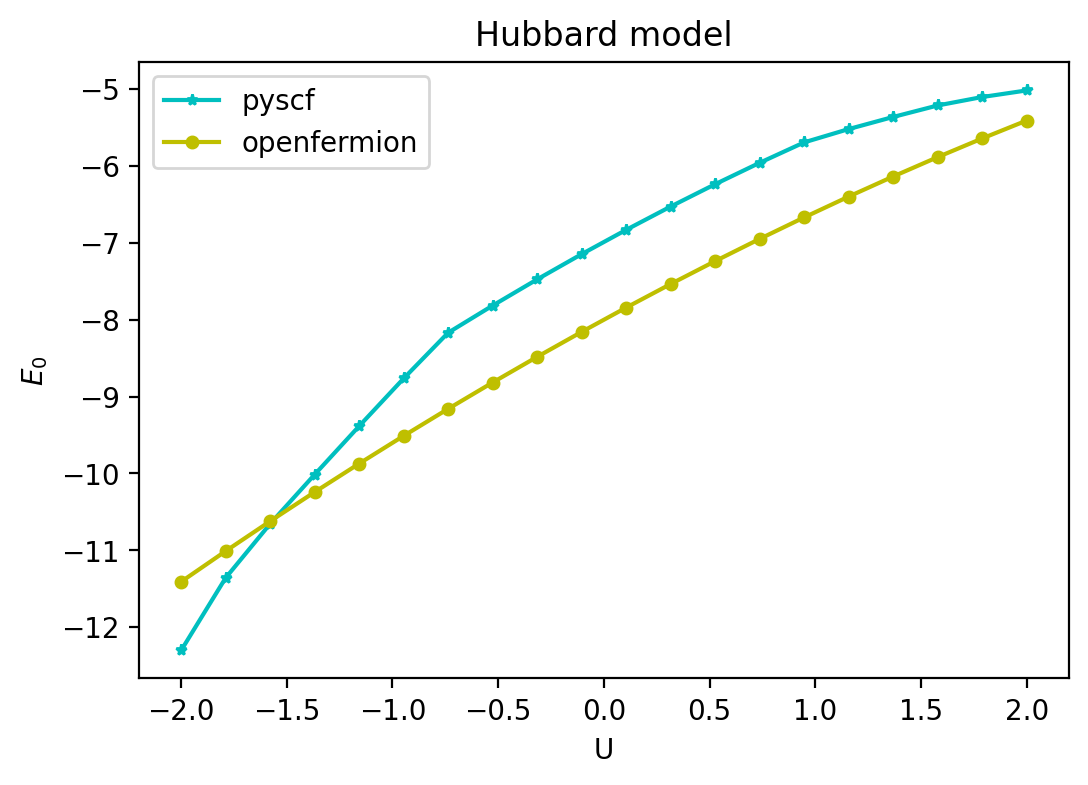

In [1]:
import copy
from itertools import product

import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
import numpy as np
from scipy import sparse
from scipy.linalg import expm

import openfermion as of
import fqe
from pyscf import gto, scf, ao2mo, cc, fci

"""Define the Hamiltonian."""
# Parameters.
# U = 2.0

u_list = np.linspace(-2.0, 2.0, 20)
e_list_pyscf = []
e_list_openfermion = []

def hubbard_openfermion(u):
    nsites = 6
    J = -1.0
    hubbard = of.fermi_hubbard(1, nsites, tunneling=-J, coulomb=u, periodic=False)
    sparse_hamiltonian = of.get_sparse_operator(hubbard)
    ground_energy, ground_state = of.get_ground_state(sparse_hamiltonian)
    # print('ground state: \n', ground_state)
    return ground_energy

def hubbard_pyscf(u):
    mol = gto.M(verbose=0)
    n = 6
    mol.nelectron = n
    # Setting incore_anyway=True to ensure the customized Hamiltonian (the _eri
    # attribute) to be used in the post-HF calculations.  Without this parameter,
    # some post-HF method (particularly in the MO integral transformation) may
    # ignore the customized Hamiltonian if memory is not enough.
    mol.incore_anyway = True

    h1 = np.zeros((n,n))
    for i in range(n-1):
        h1[i,i+1] = h1[i+1,i] = -1.0
    h1[n-1,0] = h1[0,n-1] = -1.0
    eri = np.zeros((n,n,n,n))
    for i in range(n):
        eri[i,i,i,i] = u

    mf = scf.RHF(mol);
    mf.get_hcore = lambda *args: h1
    mf.get_ovlp = lambda *args: np.eye(n)
    mf._eri = ao2mo.restore(8, eri, n)
    mf.kernel();


    # In PySCF, the customized Hamiltonian needs to be created once in mf object.
    # The Hamiltonian will be used everywhere whenever possible.  Here, the model
    # Hamiltonian is passed to CCSD object via the mf object.

    # mycc = cc.RCCSD(mf)
    # mycc.kernel()
    # e,v = mycc.ipccsd(nroots=3)
    # print(e)
    myfci = fci.FCI(mf);
    e_fci = myfci.kernel();

    return e_fci[0]


for u in u_list:
    e_list_pyscf.append(hubbard_openfermion(u))
    e_list_openfermion.append(hubbard_pyscf(u))

# print(e_list)
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(u_list, e_list_pyscf, 'c-*', markersize=4, label='pyscf')
ax.plot(u_list, e_list_openfermion, 'y-o', markersize=4, label='openfermion')
ax.set_xlabel('U')
ax.set_ylabel(r'$E_0$')
ax.set_title('Hubbard model')
ax.legend()